# MODEL 3: CNN
Omar Ebrahim & Kareem Eltouny

STEP 1: Importing the libraries.

In [1]:
import time
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import Input

STEP 2: Importing the dataset & splitting them to training and testing.

In [2]:
fashionTrain = pd.read_csv("fashion-mnist_train.csv")
fashionTest = pd.read_csv("fashion-mnist_test.csv")

# The splitting was done without a library instead of using the train test split function.
# This is due to us reading from 2 separate CSV files.
X_train = fashionTrain.iloc[:, 1:]
y_train = fashionTrain.iloc[:, 0]
X_test = fashionTest.iloc[:, 1:]
y_test = fashionTest.iloc[:, 0]

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

X_train.shape

(60000, 28, 28, 1)

STEP 3: Pre-Processing Part 1: Normalization 

In [3]:
# Pixels are in range 0 to 255.
# The range that a single 8-bit byte can offer.
# We normalized X and y as ‘float32’, which means that it is of single precision and cuts the memory in half.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. 
X_train /= 255.0
X_test /=255.0

STEP 4: Training the CNN Model.

In [5]:
# Creating the sequential model.
model = Sequential()
# Input layer with a shape of (28, 28, 1) which is addressing grayscale image.
model.add(Input(shape=(28, 28, 1)))
# Convolutional layer with 32 filters, a kernel size of (3, 3).
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='valid',
                 strides=(1, 1)))
# MaxPooling layer with a pool size of (2, 2) to down-sample any spatial dimensions.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer with 64 filters, a kernel size of (3, 3),
# ReLU activation, valid padding, and stride of (1, 1)
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='valid',
                 strides=(1, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
# Dropout rate of 0.5 to prevent overfitting.
model.add(Dropout(0.5))
# Softmax activation used for multi-class classification.
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [6]:
# adam optimizer used for robustness to noisy graidents.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# These generated a good accuracy score. Other hyperparameters were tested on a separate file.
hist = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.05)

Epoch 1/150
891/891 [==============================] - 40s 43ms/step - loss: 0.6144 - accuracy: 0.7773 - val_loss: 0.4144 - val_accuracy: 0.8583
Epoch 2/150
891/891 [==============================] - 36s 40ms/step - loss: 0.4223 - accuracy: 0.8501 - val_loss: 0.3645 - val_accuracy: 0.8757
Epoch 3/150
891/891 [==============================] - 34s 38ms/step - loss: 0.3787 - accuracy: 0.8641 - val_loss: 0.3404 - val_accuracy: 0.8740
Epoch 4/150
891/891 [==============================] - 33s 38ms/step - loss: 0.3523 - accuracy: 0.8725 - val_loss: 0.3209 - val_accuracy: 0.8800
Epoch 5/150
891/891 [==============================] - 34s 39ms/step - loss: 0.3280 - accuracy: 0.8813 - val_loss: 0.2949 - val_accuracy: 0.8957
Epoch 6/150
891/891 [==============================] - 36s 40ms/step - loss: 0.3151 - accuracy: 0.8874 - val_loss: 0.2849 - val_accuracy: 0.8987
Epoch 7/150
891/891 [==============================] - 34s 38ms/step - loss: 0.3029 - accuracy: 0.8906 - val_loss: 0.2800 - val_ac

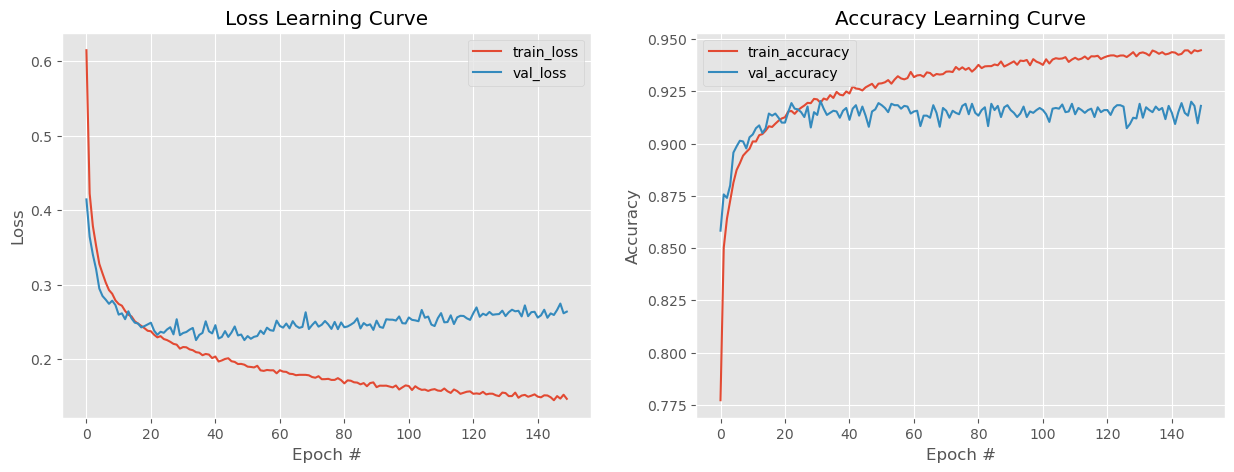

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) 
plt.plot(np.arange(0, len(hist.history['loss'])), hist.history['loss'], label='train_loss')
plt.plot(np.arange(0, len(hist.history['val_loss'])), hist.history['val_loss'], label='val_loss')
plt.title('Loss Learning Curve')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(np.arange(0, len(hist.history['accuracy'])), hist.history['accuracy'], label='train_accuracy')
plt.plot(np.arange(0, len(hist.history['val_accuracy'])), hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Learning Curve')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')  
plt.legend()

plt.show()

In [29]:
print('Networking!')
logits = model.predict(X_test, batch_size=50)
print(logits)

Networking!
200/200 [==============================] - 1s 7ms/step
[[9.96588349e-01 1.25302642e-11 6.81317295e-04 ... 9.02138815e-20
  9.67283320e-09 1.20363937e-21]
 [9.02452210e-11 1.00000000e+00 2.23372279e-10 ... 2.68542015e-18
  5.93850802e-11 4.77560598e-14]
 [1.13953211e-04 2.92324401e-20 9.97009754e-01 ... 1.58848314e-23
  4.26635418e-15 7.06530686e-22]
 ...
 [8.52996006e-16 7.18309854e-27 1.35986825e-16 ... 2.31930115e-24
  1.00000000e+00 1.94019090e-19]
 [6.53468451e-05 2.67339129e-13 1.57469594e-06 ... 1.79548793e-20
  9.99894977e-01 1.32635026e-14]
 [1.29171110e-06 9.99914050e-01 1.77254005e-05 ... 5.58360773e-15
  2.00706927e-05 1.17427647e-11]]


STEP 5: Get the accuracies and F1 score.

In [34]:
y_predict = np.argmax(logits, axis=1)
TestingAccuracy = accuracy_score(y_test, y_predict)
f1Test = f1_score(y_test, y_predict, average='weighted')
Classfication = classification_report(y_test, y_predict)

Scores = pd.DataFrame({
    'Accuracy_Training': [0.947],
    'Accuracy_Testing': [TestingAccuracy],
    'F1_Score_Test': [f1Test],
    'Time (minutes)': [92.12]  
})
Scores

,Accuracy_Training,Accuracy_Testing,F1_Score_Test,Time (minutes)
0,0.947,0.922,0.921582,92.12


In [35]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(
    classification_report(
        y_test, y_predict, target_names=classes
    )
)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.91      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.89      0.88      1000
       Dress       0.93      0.94      0.93      1000
        Coat       0.89      0.88      0.89      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.81      0.73      0.76      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



STEP 8: Visualizing using the Confusion Matrix.

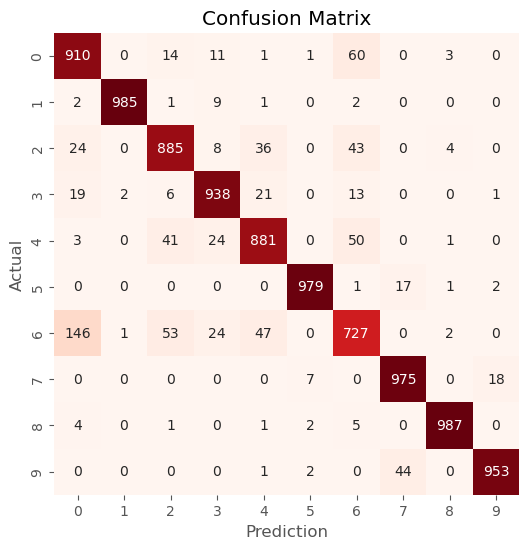

In [28]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()